##READMISSION FLAG INDICATOR AI/ML

#Importing DataSet

In [1]:
#Code Snippet 1
#Installing pycaret For ML modeling
!pip install -U --pre pycaret

In [2]:
#Code Snippet 2
#Import Pandas
import pandas as pd

#importing Dataset
data=pd.read_csv('https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/PCCI%20Cases%20Readmit30%20Data.csv')

#Displaying the Data
data

,Admit_Week,Admit_Month,Gender,Marital_Status,Insurance_Provider,Tobacco_User,Depression,ICU,Drug_Abuse,Mood_Disorder,...,Temperature,Pat_Pain_Score,ER_Visits,IP_Visits,Chronic_Conditions,Glucose,Condition,Care_Plan_Following_Discharge,Cost_Of_Initial_Stay,Readmit30
0,Sunday,Jan,F,Married,Medicare,Never,No,No,No,Yes,...,98.0,0,5,0,8,113,Pneumonia,Skilled Nursing Facility,8004.80,1
1,Sunday,Jan,M,Married,Medicare,Quit,No,No,No,No,...,98.0,2,0,0,7,109,Pneumonia,Telehealth,3205.12,0
2,Sunday,Jan,F,Single,Medicare,Never,No,No,No,No,...,98.0,0,0,0,6,98,Heart_Failure,Skilled Nursing Facility,15694.26,0
3,Sunday,Jan,M,Married,Medicare,Quit,No,No,No,No,...,99.0,0,3,0,7,135,Heart_Failure,Telehealth,10014.29,0
4,Sunday,Jan,F,Single,Commercial,Never,No,No,No,No,...,98.0,0,0,0,2,126,Heart_Failure,Telehealth,8798.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,Saturday,Dec,M,Married,Medicare,Quit,No,Yes,No,No,...,97.0,3,2,0,4,96,Heart_Failure,Discharged to Home,5359.67,0
12976,Saturday,Dec,F,Single,Medicaid,Quit,No,No,No,No,...,99.0,4,3,0,7,157,Pneumonia,Discharged to Home,5536.30,0
12977,Saturday,Dec,M,Single,Medicare,Quit,No,No,No,No,...,97.0,0,1,0,5,203,Pneumonia,Discharged to Home,5427.93,0
12978,Saturday,Dec,M,Married,Medicare,Quit,No,No,No,No,...,99.0,2,3,0,5,138,Pneumonia,Hospice,3112.01,0


In [20]:
#code Snippet 3
#displaying column
data.dtypes


,0
Admit_Week,object
Admit_Month,object
Gender,object
Marital_Status,object
Insurance_Provider,object
Tobacco_User,object
Depression,object
ICU,object
Drug_Abuse,object
Mood_Disorder,object


#AI/ML Model Testing Process

In [4]:
#Code Snippet 4
#importing pycare regression modules
from pycaret.classification import *


In [5]:
#Code Snippet 5
#Setting the target Variables
y = 'Readmit30'

#Setting ignored Varibles(noise varibles missing more thant 20%)
ignored_cols= [ 'Admit_Week', 'Admit_Month','Temperature', 'Weight', 'Height']

In [6]:
# Code snippet 7
# Setting the categorical variables
cat_cols = ['Care_Plan_Following_Discharge', 'Insurance_Provider', 'Gender', 'Condition', 'Marital_Status','Tobacco_User', 'Depression', 'ICU', 'Drug_Abuse','Mood_Disorder', 'Diabetes', 'Anxiety', 'Dementia','Obesity']

In [7]:
# Code snippet 7
# Setting the numerical PREDICTOR variables
num_cols = ['Chronic_Conditions', 'Pat_Pain_Score','Pulse',
       'ER_Visits', 'IP_Visits','Age','Cost_Of_Initial_Stay','Glucose','Bmi']

In [8]:
# Code snippet 8
# Setting up/configuring the pycaret setup for ML modeling
classification_setup = setup(data,
                        target = y,
                        ignore_features = ignored_cols,
                        categorical_features = cat_cols,
                        numeric_features = num_cols, train_size = 0.7)

,Description,Value
0,Session id,4230
1,Target,Readmit30
2,Target type,Binary
3,Original data shape,"(12980, 29)"
4,Transformed data shape,"(12980, 35)"
5,Transformed train set shape,"(9086, 35)"
6,Transformed test set shape,"(3894, 35)"
7,Ignore features,5
8,Numeric features,9
9,Categorical features,14


#Compare ML models

In [9]:
#Code Snippet 9
#Run Pycare For ML Modeling
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8369,0.6814,0.1687,0.9104,0.2841,0.2386,0.3496,1.6080
et,Extra Trees Classifier,0.8351,0.6667,0.1876,0.8085,0.3037,0.2497,0.3371,1.3900
lightgbm,Light Gradient Boosting Machine,0.8224,0.6852,0.1379,0.6994,0.2293,0.1771,0.2540,0.8530
xgboost,Extreme Gradient Boosting,0.8173,0.6695,0.2139,0.5685,0.3103,0.2292,0.2660,0.4900
gbc,Gradient Boosting Classifier,0.8112,0.6766,0.0532,0.6065,0.0972,0.0687,0.1363,2.0170
lda,Linear Discriminant Analysis,0.8079,0.6641,0.0566,0.5051,0.1014,0.0656,0.1173,0.4240
dummy,Dummy Classifier,0.8076,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2510
lr,Logistic Regression,0.8074,0.6377,0.0240,0.4752,0.0456,0.0282,0.0712,1.9360
ridge,Ridge Classifier,0.8071,0.6641,0.0114,0.4542,0.0221,0.0127,0.0450,0.2600
ada,Ada Boost Classifier,0.8071,0.6462,0.0418,0.4836,0.0763,0.0475,0.0946,0.8240


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=4230, verbose=0,
                       warm_start=False)

#Best Model

In [10]:
# Code snippet 10
# Building the model with the best algorithm
best_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8317,0.6840,0.1371,0.9231,0.2388,0.1989,0.3179
1,0.8383,0.6989,0.1771,0.9118,0.2967,0.2497,0.3596
2,0.8306,0.6785,0.1543,0.8182,0.2596,0.2114,0.3080
3,0.8416,0.7042,0.1943,0.9189,0.3208,0.2718,0.3795
4,0.8460,0.6996,0.2114,0.9487,0.3458,0.2964,0.4061
5,0.8416,0.6896,0.1943,0.9189,0.3208,0.2718,0.3795
6,0.8370,0.6393,0.1609,0.9333,0.2745,0.2312,0.3483
7,0.8359,0.6563,0.1494,0.9630,0.2587,0.2185,0.3431
8,0.8359,0.6929,0.1657,0.9062,0.2802,0.2346,0.3457


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Code snippet 11
# Predicting standard scores on a dataset
predictions = predict_model(best_model, data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9501,0.9598,0.7461,0.9925,0.8519,0.8226,0.8347


In [12]:
# Code snippet 12
# Exporting predictions to a csv file
predictions.to_csv('PCCI Readmition Status predictions RF model.csv')

#Model Visuals

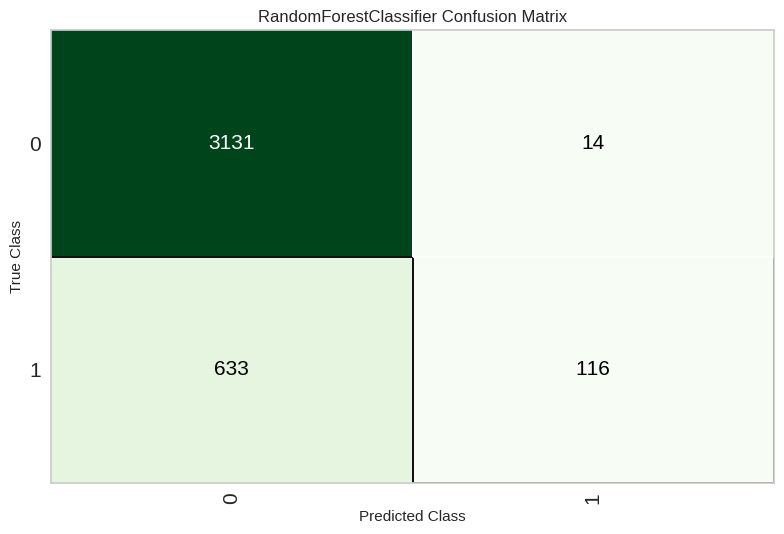

In [13]:
# Code Snippet 13
# Plot the confusion matrix for the Best Model
plot_model(best_model, plot="confusion_matrix")

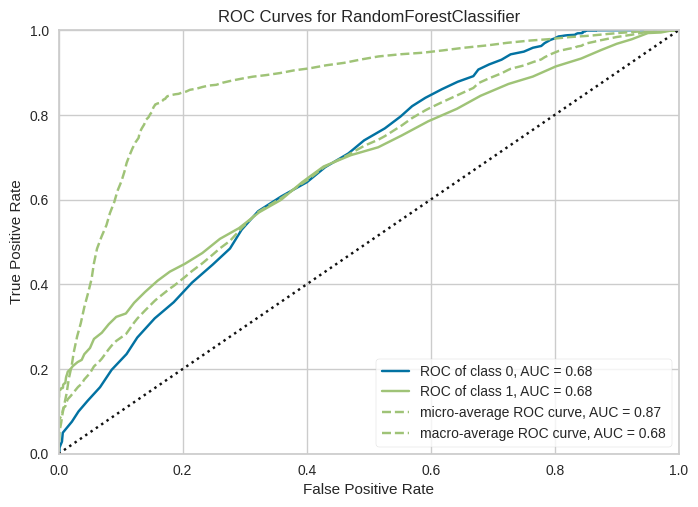

In [14]:
# Code Snippet 14
# Plot the ROC curve (AUC) for the Best Model
plot_model(best_model, plot="auc")


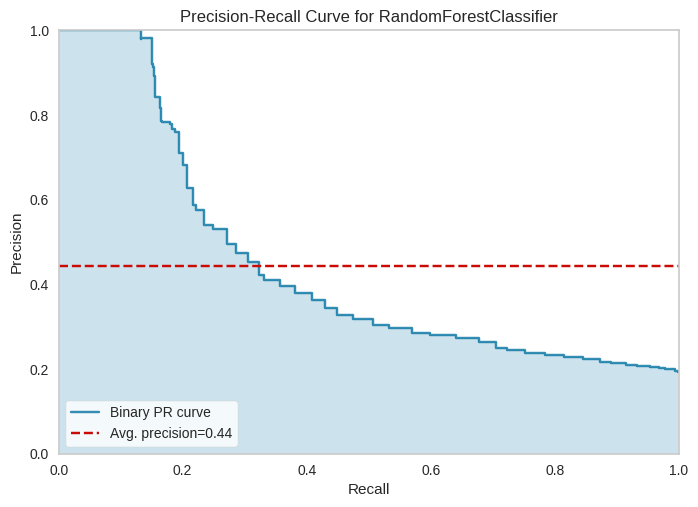

In [15]:
# Code Snippet 15
# Plot the Precision-Recall curve
plot_model(best_model, plot="pr")



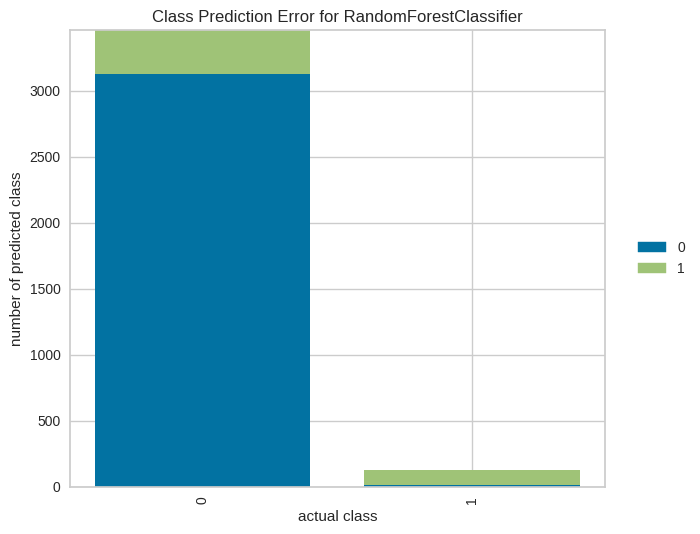

In [16]:
# Code Snippet 16
# Plot the class prediction error
plot_model(best_model, plot="error")


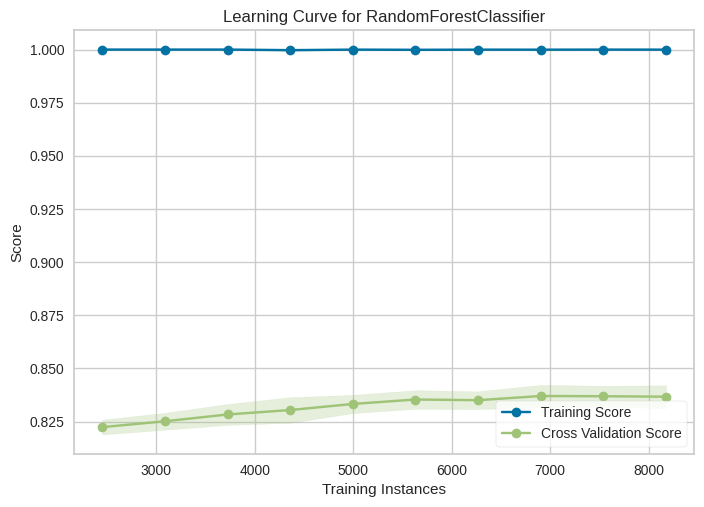

In [17]:
# Code Snippet 17
# Plot the learning curve
plot_model(best_model, plot="learning")


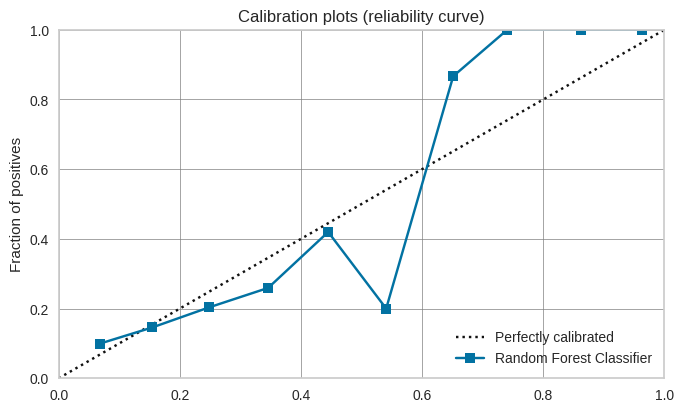

In [18]:
# Code Snippet 18
# Plot the calibration curve
plot_model(best_model, plot="calibration")
